In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [176]:
housing_data = pd.read_csv('datasets/housing.csv')

## Clean up data

In [177]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             965
latitude              965
housing_median_age    965
total_rooms           965
total_bedrooms        958
population            965
households            965
median_income         965
median_house_value    965
ocean_proximity       965
dtype: int64

In [178]:
housing_data['median_house_value'].max()

500001.0

In [179]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [180]:
housing_data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [181]:
housing_data = housing_data.dropna()

In [182]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [183]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [184]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
69,-122.29,37.81,46.0,2801.0,644.0,1823.0,611.0,0.9802,129200.0,0,0,0,1,0
7066,-118.03,33.94,34.0,1748.0,386.0,917.0,378.0,3.4792,169000.0,1,0,0,0,0
18673,-121.88,36.96,18.0,4910.0,817.0,1971.0,773.0,5.8325,308800.0,0,0,0,0,1
11887,-117.36,33.98,46.0,1680.0,453.0,1570.0,435.0,2.0436,82300.0,0,1,0,0,0
1784,-122.36,37.94,41.0,2591.0,585.0,1638.0,462.0,1.8220,79700.0,0,0,0,1,0


## Set Features and Targets

In [185]:
# Features
X = housing_data.drop('median_house_value', axis=1) # axis = 1 --> columns

# Predictions
Y = housing_data['median_house_value']

In [186]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [187]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [188]:
y_train.shape, y_test.shape

((15580,), (3895,))

### Linear regression

In [189]:
# Normalize all values between 0 and 1
# Fir eg. train the model
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [190]:
print('Training score (R-square): ', linear_model.score(x_train, y_train))

Training score (R-square):  0.6139899710685739


In [191]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [192]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

ocean_proximity_INLAND       -2.615195e+16
ocean_proximity_NEAR BAY     -2.615195e+16
ocean_proximity_<1H OCEAN    -2.615195e+16
ocean_proximity_NEAR OCEAN   -2.615195e+16
ocean_proximity_ISLAND       -2.615195e+16
longitude                    -2.398564e+04
latitude                     -2.193870e+04
population                   -3.009368e+01
total_rooms                  -6.513269e+00
households                    4.326786e+01
total_bedrooms                8.900134e+01
housing_median_age            1.004725e+03
median_income                 3.850403e+04
dtype: float64

In [193]:
y_pred = linear_model.predict(x_test)

## Visualizing results

In [194]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
15044,321508.0,316400.0
2309,147744.0,108200.0
4363,321444.0,423700.0
6127,179188.0,153400.0
19347,248804.0,201700.0
7578,155220.0,120200.0
11880,145124.0,169100.0
4090,235380.0,372300.0
19765,61220.0,63300.0
13383,170464.0,157600.0


In [195]:
print('Testing score:', r2_score(y_test, y_pred))

Testing score: 0.6077595952804653


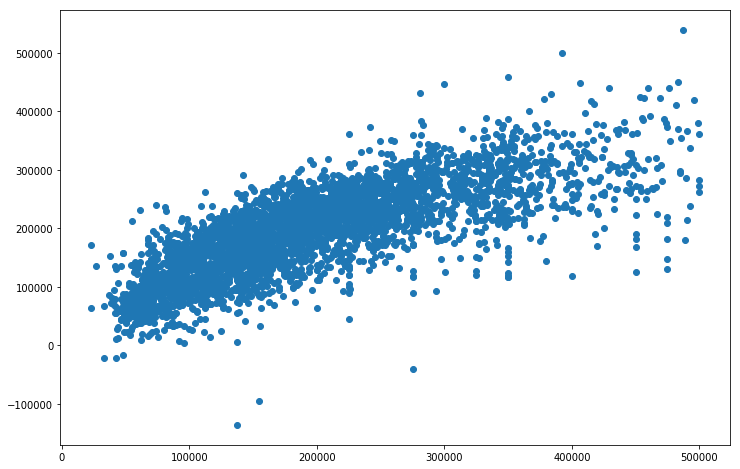

In [196]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.show()

In [197]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [198]:
df_pred_actual_sample.head()

,index,predicted,actual
0,2401,70512.0,90500.0
1,15048,292992.0,303400.0
2,20409,231632.0,264600.0
3,15532,199688.0,199800.0
4,8393,193344.0,129200.0


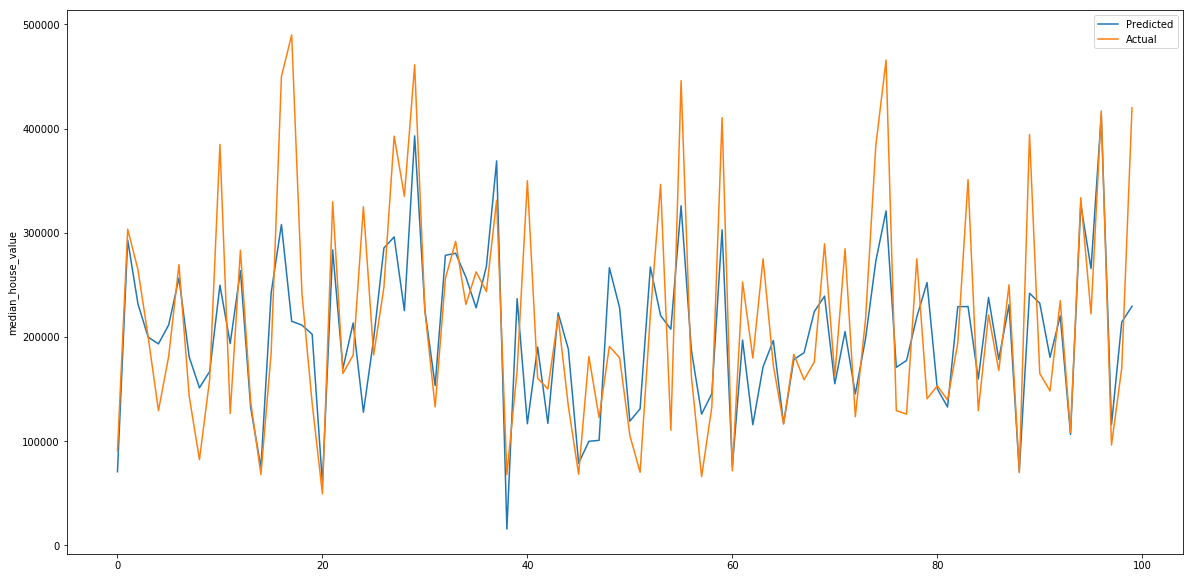

In [199]:
plt.figure(figsize=(20,10))
plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')
plt.ylabel('median_house_value')
plt.legend()
plt.show()